# **Analyzing Rate of Consumer Complaints Against Different Mortgage Lenders**

**Name:** Evan Shields

**Email:** eshie003@odu.edu

**Portfolio Link:**  https://efws777.github.io

**Project Link:** https://github.com/Efws777/620FP

# **Abstract**

This study aims to analyze consumer complaints against mortgage lenders relative to their market share. I utilize the Consumer Complaint Database (filtered for only 2023 complaints), maintained by the Consumer Financial Protection Bureau, and a list of the top 25 mortgage lenders in the U.S.(2023) compiled by the Federal Financial Institutions Examination Council. By utilizing both of these datasets, I will investigate which lenders receive the most complaints adjusted for their market size. This analysis provides valuable insights into consumer experiences with different mortgage lenders and potentially identify lenders with disproportionately high or low complaint volumes.

As each complaint follows stringent guidelines to be entered into the official Consumer Complaint Database, this consumer complaint data is reliable and transparent. By focusing on relative performance, this analysis provides a more nuanced understanding of consumer experience with mortgage lenders. Discrepancies between market size and complaint volume is revealed, highlighting lenders with potentially problematic practices. This research benefits both consumers and mortgage lenders. Consumers can gain valuable information about lender performance, while lenders may identify areas for improvement based on complaint trends.


Links:

[Comsumer Complaint Database Info](https://www.consumerfinance.gov/data-research/consumer-complaints/)

*   [2023 Mortage Consumer Complaints](https://drive.google.com/file/d/1xV88TXqpHhs_LdID-y6EeRncC1HXsRBS/view?usp=sharing)

*   [2023 Largest Mortgage Lenders](https://infogram.com/largest-mortgage-providers-table-1hzj4o3z9lvw34p)



Complaints Dataset Preview:

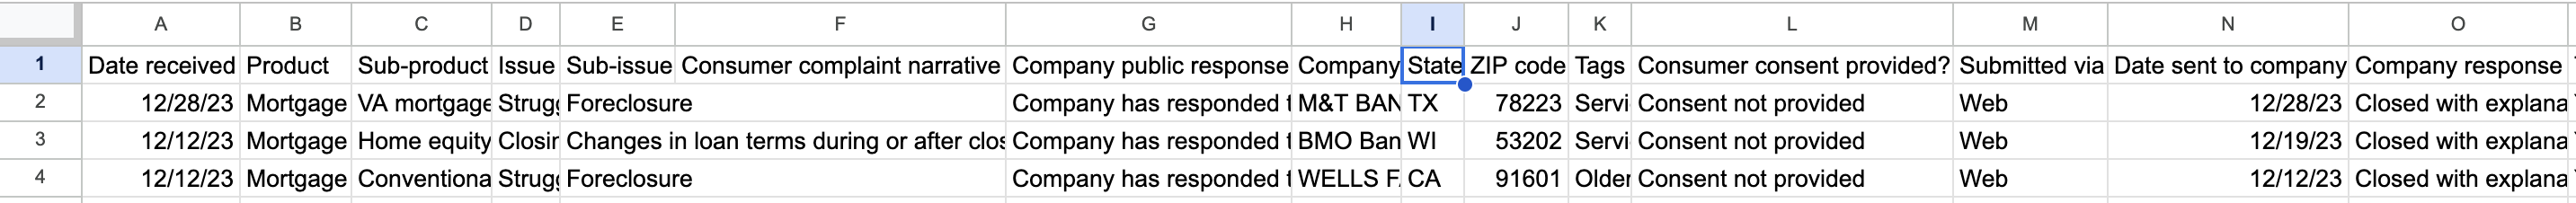

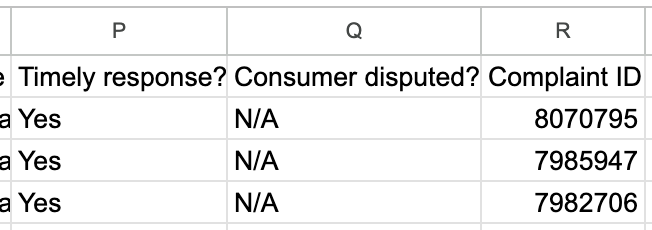

Lenders Dataset Preview:

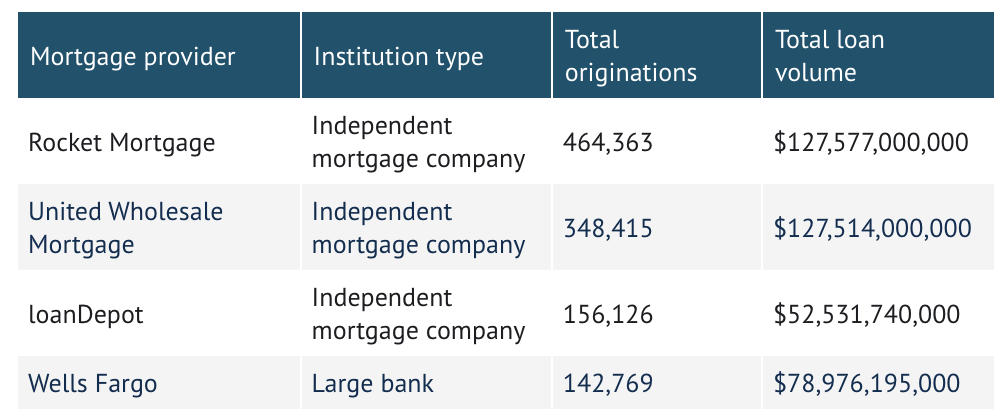

## Revised 8-Week Project Plan

### Weeks 1-2: Data Acquisition, Cleaning, and Exploration
* **Gather datasets:** Acquire the Consumer Complaint Database and the top 25 mortgage lenders list for 2023.
* **Data cleaning:** Address missing values, inconsistencies, and outliers in both datasets, ensuring data quality and accuracy.
* **Data exploration:** Conduct an initial analysis to understand the structure, variables, and distributions within the data.

### Weeks 3-4: In-Depth Analysis
* **Descriptive analysis:** Calculate summary statistics (e.g., mean, median, mode) for complaint volume, market share, and other relevant variables.
* **Correlation analysis:** Examine the relationships between complaint volume, market share, and other factors using correlation measures.
* **Regression analysis:** Employ regression models to quantify the relationship between complaint volume and market share, controlling for other relevant variables.

### Weeks 5-6: Visualization and Storytelling
* **Data visualization:** Create informative visualizations (e.g., bar charts, scatter plots, heatmaps) to illustrate key findings.
* **Narrative development:** Craft a compelling narrative to explain the research insights and their implications.
* **Storytelling techniques:** Use storytelling techniques to effectively communicate the findings to a wider audience.

### Weeks 7-8: Report Writing and Presentation
* **Report preparation:** Write a comprehensive report detailing the research methodology, findings, and conclusions.
* **Presentation development:** Create a visually appealing and informative presentation to deliver the key findings.
* **Final touches:** Review and revise the report and presentation for clarity, accuracy, and consistency.


# **Progress Check 1**

**Target Audience:** First-time home buyers wanting to know which lenders have the most and least consumer complaints

**Secondary Target Audience:** Mortgage lenders wanting to know how they rank in the industry in terms of consumer complaints

**Languages & Libraries Used So Far:** Python, Pandas, Matplotlib

**What I have done so far:**
1. Loaded in both csvs
2. Dropped columns with redundant data
3. Converted each column to an appropriate datatype
4. Dropped rows of complaints against smaller companies (ones not in the Top 25 Largest Lenders table)
5. Renamed company names in the complaints dataframe to match exactly the company names in the lenders dataframe
6. Created a preliminary visualization to get a better idea of the distribution of complaints per company

**Future Steps:**


*   Create a visualization comparing expected number of complaints based on market share and actual number of complaints
*   Look into proportions of timely responses to complaints
*   Analyze complaints based on institution type in lenders table (Independent Mortgage Company vs. Large Bank)





# **Progress Check 2**

**Target Audience:** First-time home buyers wanting to know which lenders have the most and least consumer complaints

**Secondary Target Audience:** Mortgage lenders wanting to know how they rank in the industry in terms of consumer complaints

**Languages & Libraries Used So Far:** Python, Pandas, Plotly

**What I have done so far:**
1. Dropped columns with redundant data
2. Converted each column to an appropriate datatype
3. Dropped rows of complaints against smaller companies (ones not in the Top 25 Largest Lenders table)
4. Renamed company names in the complaints dataframe to match exactly the company names in the lenders dataframe
5. Created a preliminary visualization to get a better idea of the distribution of complaints per company
6. Built out lenders table with actual number of complaints, expected number of complaints, and differential for each mortgage lender
7. Created a color-coded bar chart to determine how far each company is above or below the its expected number of complaints
8. Calculated proportions of timely responses for each mortgage lender
9. Made a histogram of the timely response proportions

**Future Steps:**

*   Machine Learning Tool I Plan to Use: NLTK library to perform sentiment analysis on 'Consumer complaint narrative' column. Most, if not, all of these complaints are expected to have a negative tone, but it will be interesting to see to what degree of negativity there is for each company
*   Add text summaries between certain code blocks to address key findings based on tables and visualizations





In [59]:
# load necessary libraries
import pandas as pd
import plotly.express as px
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# read in data
complaints = pd.read_csv('https://raw.githubusercontent.com/Efws777/620FP/refs/heads/main/complaints.csv')
lenders = pd.read_csv('https://raw.githubusercontent.com/Efws777/620FP/refs/heads/main/lenders.csv')

lenders['Total originations'] = lenders['Total originations'].str.replace(',', '').astype(int)
lenders['Total loan volume'] = lenders['Total loan volume'].str.replace('$', '').str.replace(',', '').astype(int)
lenders

,Mortgage provider,Institution type,Total originations,Total loan volume
0,Rocket Mortgage,Independent mortgage company,464363,127577000000
1,United Wholesale Mortgage,Independent mortgage company,348415,127514000000
2,loanDepot,Independent mortgage company,156126,52531740000
3,Wells Fargo,Large bank,142769,78976195000
4,Fairway Independent Mortgage Company,Independent mortgage company,127965,40808695000
5,Bank of America,Large bank,121486,53522050000
6,U.S. Bank,Large bank,119747,42530125000
7,JPMorgan Chase,Large bank,115033,72661605000
8,PNC Bank,Large bank,107904,37350450000
9,"Community Bank, N.A.",Large bank,101366,25374430000


In [60]:
# drop irrelevant columns
complaints.drop(columns=['Product', 'Consumer disputed?'], inplace=True)

In [61]:
# convert date columns to datetime type
complaints['Date received'] = pd.to_datetime(complaints['Date received'])
complaints['Date sent to company'] = pd.to_datetime(complaints['Date sent to company'])

<ipython-input-61-cdd328f5e0f5>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-61-cdd328f5e0f5>:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [62]:
# convert columns with words to string type and complaint ID to int type
complaints = complaints.astype({'Sub-product': str,
                                'Issue': str,
                                'Sub-issue': str,
                                'Consumer complaint narrative': str,
                                'Company public response': str,
                                'Company': str,
                                'State': str,
                                'Tags': str,
                                'Consumer consent provided?': str,
                                'Submitted via': str,
                                'Company response to consumer': str,
                                'Timely response?': str,
                                'Complaint ID': int })

In [63]:
# keep only complaints against companies on the Top 25 Largest Lenders list
lenders_list = ['Rocket Mortgage, LLC',
                'United Shore Financial Services, LLC',
                'LD Holdings Group, LLC',
                'WELLS FARGO & COMPANY',
                'Fairway Independent Mortgage Corporation',
                'BANK OF AMERICA, NATIONAL ASSOCIATION',
                'U.S. BANCORP',
                'JPMORGAN CHASE & CO.',
                'PNC Bank N.A.',
                'CrossCountry Mortgage LLC',
                'Caliber Home Loans, Inc.',
                'GUARANTEED RATE INC.',
                'Mortgage Research Center, LLC',
                'PENNYMAC LOAN SERVICES, LLC.',
                'Mr. Cooper Group Inc.',
                'NAVY FEDERAL CREDIT UNION',
                'Movement Mortgage LLC',
                'TRUIST FINANCIAL CORPORATION',
                'HUNTINGTON NATIONAL BANK, THE',
                'Freedom Mortgage Company',
                'Home Point Financial Corporation',
                'NEW YORK COMMUNITY BANCORP INC',
                'Guild Holdings Company',
                'DHI Mortgage Company']
complaints = complaints[complaints['Company'].isin(lenders_list)]

In [64]:
# rename companies to match exactly with company names in the lenders dataframe
new_names = ['Rocket Mortgage',
             'United Wholesale Mortgage',
             'loanDepot',
             'Wells Fargo',
             'Fairway Independent Mortgage Company',
             'Bank of America',
             'U.S. Bank',
             'JPMorgan Chase',
             'PNC Bank',
             'Crosscountry Mortgage',
             'Caliber Home Loans',
             'Guaranteed Rate',
             'Mortgage Research Center',
             'PennyMac',
             'Nationstar Mortgage',
             'Navy Federal Credit Union',
             'Movement Mortgage',
             'Truist Bank',
             'Huntington National Bank',
             'Freedom Mortgage Corporation',
             'Home Point Financial Corporation',
             'Flagstar Bank',
             'Guild Mortgage Company',
             'DHI Mortgage Company Limited']
complaints['Company'] = complaints['Company'].replace(lenders_list, new_names)
complaints

,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
2,2023-12-12,Conventional home mortgage,Struggling to pay mortgage,Foreclosure,nan,Company has responded to the consumer and the ...,Wells Fargo,CA,91601,Older American,Consent not provided,Web,2023-12-12,Closed with explanation,Yes,7982706
3,2023-11-10,Home equity loan or line of credit (HELOC),Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,nan,nan,PNC Bank,NJ,07044,nan,Consent not provided,Web,2023-11-10,Closed with explanation,Yes,7832586
4,2023-11-21,VA mortgage,Applying for a mortgage or refinancing an exis...,Confusing or misleading advertising or marketing,nan,Company has responded to the consumer and the ...,Mortgage Research Center,FL,33781,nan,Consent not provided,Web,2023-11-29,Closed with explanation,Yes,7886632
5,2023-01-19,Conventional home mortgage,Struggling to pay mortgage,nan,nan,Company has responded to the consumer and the ...,Wells Fargo,NC,28405,Servicemember,Consent not provided,Web,2023-01-19,Closed with explanation,Yes,6459119
8,2023-02-13,Conventional home mortgage,Trouble during payment process,nan,nan,Company has responded to the consumer and the ...,Wells Fargo,OH,44718,Servicemember,Consent not provided,Web,2023-02-13,Closed with explanation,Yes,6567651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22854,2023-03-13,Home equity loan or line of credit (HELOC),Trouble during payment process,nan,For over the past 2+ years I have been paying ...,nan,JPMorgan Chase,IL,XXXXX,nan,Consent provided,Web,2023-03-13,Closed with explanation,Yes,6687178
22855,2023-03-13,FHA mortgage,Closing on a mortgage,nan,On XX/XX/2018 I close my mortgage loan with Ro...,nan,Rocket Mortgage,TX,77039,nan,Consent provided,Web,2023-03-13,Closed with explanation,Yes,6687229
22856,2023-01-26,Home equity loan or line of credit (HELOC),Trouble during payment process,nan,nan,nan,PNC Bank,NC,27603,nan,Consent not provided,Web,2023-01-26,Closed with explanation,Yes,6491868
22857,2023-03-20,FHA mortgage,Struggling to pay mortgage,nan,I had a Wells Fargo Mortgage during the time t...,Company has responded to the consumer and the ...,Wells Fargo,NM,87109,nan,Consent provided,Web,2023-03-20,Closed with explanation,Yes,6721244


In [65]:
# bar chart of top mortgage lenders versus how many consumer complaints they each have
company_counts = complaints['Company'].value_counts()
company_counts_df = company_counts.to_frame().reset_index()
company_counts_df.columns = ['Company', 'Count']
fig = px.bar(company_counts_df, x='Company', y='Count', title='Consumer Complaints per Mortgage Lender')
fig.show()

In [66]:
# As we can see in the above chart, Wells Fargo and Nationstar Mortgage have an inordinately large share of complaints against them.
# It will be interesting to see if they are still the top 2 after standardizing for market share.

In [67]:
# unable to confirm complaints that should be attributed to 'Community Bank, N.A.', and only found four possibles, so I am
# eliminating this lender from my analysis so as not to throw off the results
lenders = lenders.drop(9)

In [68]:
# calculate column for expected number of complaints based on number of total originations total loan volume
total_complaints = len(complaints)
total_originations = sum(lenders['Total originations'])
total_volume = sum(lenders['Total loan volume'])

# expected complaints calculated using relative total originations and relative total loan volume
lenders['Expected Complaints'] = ((((lenders['Total originations'] / total_originations) * total_complaints) + ((lenders['Total loan volume'] / total_volume) * total_complaints)) / 2).round().astype(int)

# add complaint counts to lender data frame
company_counts = company_counts.reset_index()
lenders = lenders.merge(company_counts, left_on='Mortgage provider', right_on='Company')
lenders = lenders.drop(columns=['Company'])
lenders = lenders.rename(columns={'count' : 'Actual Complaints'})

# metric for higher than expected complaints (positive number) and lower than expected complaints (negative number)
lenders['Actual Minus Expected'] = lenders['Actual Complaints'] - lenders['Expected Complaints']
ame = lenders.sort_values(by='Actual Minus Expected', ascending=False)
ame

# bar graph showing the above metric for each mortgage lender
fig = px.bar(ame, x='Mortgage provider', y='Actual Minus Expected', color='Actual Minus Expected', color_continuous_scale='RdBu_r')
fig.update_layout(coloraxis_cmin=-max(abs(ame['Actual Minus Expected'])), coloraxis_cmax=max(abs(ame['Actual Minus Expected'])))
fig.update_layout(title='Difference Between Actual and Expected Complaints', yaxis_title = 'Number of Actual Minus Number of Expected Complaints', plot_bgcolor='#b5b5b5')
fig.show()

# higher rank means less complaints relative to market share size
ame['ame_rank'] = ame['Actual Minus Expected'].rank(ascending=True)
ame = ame.sort_values(by='ame_rank')
ame['ame_rank'] = ame['ame_rank'].astype(int)


In [69]:
# The three mortgage lenders with the highest above expected number of consumer complaints are Wells Fargo,
# Nationstar Mortgage, and Freedom Mortgage Corporation.

# It will be interesting to see if the consumer complaint narratives attributed to these three companies also have a more
# negative sentiment than the ones from the other lenders.

# The five mortgage lenders with the lowest below expected number of consumer complaints are Rocket Mortgage, United
# Wholesale Mortgage, Fairway Independent Mortgage Company, loanDepot, and Guaranteed Rate.

In [70]:
# calculate percentage of complaints that received a timely response for each mortgage lender
timely_response_proportions = complaints.groupby('Company')['Timely response?'].value_counts(normalize=True).unstack()['Yes']

timely_response_df = pd.DataFrame(timely_response_proportions)
timely_response_df.columns = ['Proportion of Timely Responses']

print(timely_response_df)

# histogram showing distribution of timely response proportions
fig = px.histogram(timely_response_df, x='Proportion of Timely Responses', title='Distribution of Timely Response Proportions')
fig.show()

                                      Proportion of Timely Responses
Company                                                             
Bank of America                                             0.994307
Caliber Home Loans                                          0.979730
Crosscountry Mortgage                                       1.000000
DHI Mortgage Company Limited                                1.000000
Fairway Independent Mortgage Company                        1.000000
Flagstar Bank                                               1.000000
Freedom Mortgage Corporation                                1.000000
Guaranteed Rate                                             1.000000
Guild Mortgage Company                                      0.976744
Home Point Financial Corporation                            0.954545
Huntington National Bank                                    1.000000
JPMorgan Chase                                              1.000000
Mortgage Research Center          

In [71]:
# As we can see from this histogram, the overwhelming majority of the top 25 mortgage lenders have a 100% on-time response
# rate to consumer complaints

# Even the lowest on-time response rate is still at 95%, and there are only five mortgage lenders with an on-time response
# rate below 100%.

In [72]:
# download vader lexicon module
nltk.download('vader_lexicon')

def sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    # return overall sentiment score
    return scores['compound']

# group complaints by company and analyze sentiment
sentiments = complaints.groupby('Company')['Consumer complaint narrative'].apply(lambda x: x.apply(sentiment_scores).mean())

# reset index to get company names back as a column
sentiments = sentiments.reset_index()
# rename columns for clarity
sentiments.columns = ['Company', 'Average Sentiment']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [73]:
# sort companies by their average sentiment score
sentiments = sentiments.sort_values(by='Average Sentiment', ascending=True)

fig = px.bar(sentiments, x='Average Sentiment', y='Company', orientation='h',
             color='Average Sentiment',
             color_continuous_scale='RdBu')

# set color axis limits based on the biggest absolute sentiment value
max_abs_value = max(abs(sentiments['Average Sentiment']))
fig.update_layout(coloraxis_cmin=-max_abs_value, coloraxis_cmax=max_abs_value)

# customize the chart layout
fig.update_layout(title='Complaint Sentiment Scores by Mortgage Lender',
                  yaxis_title='Mortgage Provider',
                  plot_bgcolor='#b5b5b5')
fig.show()

In [74]:
# Surprisingly, there are ten mortgage lenders with a positive average consumer complaint narrative sentiment scores

# 14 mortgage lenders have a negative average consumer complaint narrative sentiment scores

# Even more surprisingly, the highest average consumer complaint narrative sentiment score is higher than the absolute
# value of the lowest average consumer complaint narrative. This means that though there are more companies with
# negative average consumer complaint narrative sentiment scores, the most negative average score is not as negative
# as the most positive one is positive. And this is by almost 3 fold, which is a bit shocking.

In [75]:
# higher rank means a more positive sentiment
sentiments['sentiment_rank'] = sentiments['Average Sentiment'].rank(ascending=False)

# sort companies by their sentiment rank
sentiments = sentiments.sort_values(by='sentiment_rank')

# convert sentiment rank to integer
sentiments['sentiment_rank'] = sentiments['sentiment_rank'].astype(int)

# merge with 'ame' DataFrame to add 'ame_rank' column
sentiments = sentiments.merge(ame[['Mortgage provider', 'ame_rank']],
                               left_on='Company',
                               right_on='Mortgage provider',
                               how='left')

# drop the redundant 'Mortgage provider' column
sentiments.drop('Mortgage provider', axis=1, inplace=True)

In [76]:
fig = px.scatter(sentiments, x='ame_rank', y='sentiment_rank',
                 hover_name='Company',
                 labels={'ame_rank': 'Number of Complaints Rank (Adjusted for Market Share Size)', 'sentiment_rank': 'Sentiment Rank'})
fig.show()

In [77]:
# When plotting the ranking of number of complaints (relative to market share) against the ranking of average sentiment
# score, it is clear that there is little to no correlation between the two.

# **Conclusion**

When a consumer is choosing a mortgage lender to help them finance a home, it is important that they choose one that has a high rate of consumer satisfaction. An understanding of consumer satisfaction can be attained through analyzing consumer complaint data. Through this analysis, I have identified lenders to avoid based on the number of consumer complaints against the lender, on-time response rate to consumer complaints, and the overall sentiment score of these complaints.
<br>
<br>
Let's begin with the mortgage lenders to avoid. These include **Wells Fargo**, **Nationstar Mortgage**, and **Freedom Mortgage Corporation** due to their extremely high above expected number of complaints during 2023. Wells Fargo's mortgage lending department had almost 3500 consumer complaints in 2023 which is almost 2800 more than expected given its relative size in the mortgage lending market. Nationstar Mortgage had over 1800 consumer complaints which is almost 1600 more than expected. Lastly, Freedom Mortgage Corporation had almost 800 complaints which is more than 500 over the expected amount given their relative market size.
<br>
<br>
While most (19/24) of the top lenders scored a perfect 100% on-time response rate to consumer complaints during 2023, there were a few that were lagging a bit behind in this metric. These companies include **Home Point Financial Corporation**, **loanDepot**, **Guild Mortgage Company**, and **Caliber Home loans**. While these companies were not perfect in this category, I should note that all of them still had an on-time response rate between 95% and 98%. Lastly, after conducting sentiment analysis on the consumer complaint narratives for each lender, while these are of course expected to have a negative sentiment, there were two companies in particular (**Crosscountry Mortgage** and **Movement Mortgage**) that had an average sentiment score of below -0.09 (the lowest scores of any lender) on a scale from -1 to 1.
<br>
<br>
There are quite a few mortgage lenders that scored better in these key metrics mentioned above. As for number of consumer complaints, there are four notable companies that had well below the expected number of complaints given their market share size. These companies include **Rocket Mortgage** and **United Wholesale Mortgage** (more than 1000 complaints below expected) and **Fairway Independent Mortgage Company** and **loanDepot** (more than 300 complaints below expected). While 10 of the 24 top mortgage lenders actually had positive average sentiment scores among consumer complaint narratives, there were four lenders that stood out in having extra high sentiment scores, suggesting that customers of these lenders, while displeased by a specific incident, have generally been satisfied with the lender and there experience as a whole with the lender. These lenders include **Fairway Independent Mortgage Company** (sentiment score of 0.32), **Freedom Mortgage Corporation** (0.31), **DHI Mortgage Company Limited** (0.21), and **Mortgage Research Center** (0.16).